In [13]:
import numpy as np 
import matplotlib.pyplot as plt 


In [14]:
# importing data
q = 0.1 
fname = "DATA/dataRBM_q"+str(q)+".csv"

In [15]:
# loading data
v = np.loadtxt(fname,delimiter=",",dtype=int)
N = len(v) # so it is its number of lines 
L = len(v[0]) # it is instead the number of dimensions of feature space for our samples
print(f"each of N={N} data samples has L={L} digits")
# let's print some of the samples 
print(v[0:10])

each of N=10000 data samples has L=8 digits
[[0 1 0 0 1 0 1 1]
 [1 1 0 1 1 0 0 1]
 [0 1 1 1 0 0 1 1]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 0 0 1 0]
 [1 1 0 0 1 0 0 0]
 [0 1 1 0 1 1 0 0]
 [1 1 0 0 0 0 1 1]
 [1 0 0 1 1 1 0 1]
 [1 0 0 0 0 0 1 0]]


In [16]:
# let's introducing now a boolean variable called spins that represents the choise of plus minus one instead of 0,1

SPINS = True 
if SPINS:
    vmin = -1
    gap = 2
    # v now has to be converted into spin variables 
    v = 2*v -1
else:
    vmin = 0
    gap = 1

# let's store the initial values because later on we are going to shuffle them
v0 = np.copy(v)

# since we have introduced spins let's see how they are represented

print(v[0:10])

[[-1  1 -1 -1  1 -1  1  1]
 [ 1  1 -1  1  1 -1 -1  1]
 [-1  1  1  1 -1 -1  1  1]
 [-1 -1  1  1  1  1 -1 -1]
 [-1 -1  1  1 -1 -1  1 -1]
 [ 1  1 -1 -1  1 -1 -1 -1]
 [-1  1  1 -1  1  1 -1 -1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1  1  1 -1  1]
 [ 1 -1 -1 -1 -1 -1  1 -1]]


In [17]:
# building our boltzmann machine 

# n of hidden units
# people have tried many initializations and as far we are going to see this denominator scales as the dimension of the samples 

M = 3 
sigma = np.sqrt(4. / float(L + M)) 

np.random.seed(12345)
w = sigma + (2*np.random.rand(L,M) - 1)
# numbers from -sigma to sigma 
a = sigma + (2*np.random.rand(L) - 1)
# for set of visible units there is a random local field 
b = np.zeros(M)
print("w=",w,"\n","a=",a,"\n","b=",b) 

w= [[ 1.46225487  0.2357738  -0.02913969]
 [ 0.01214325  0.73847275  0.7941121 ]
 [ 1.53205173  0.90937688  1.10083596]
 [ 0.91016243  1.09845231  1.52563616]
 [-0.38020071 -0.18408856  0.20043012]
 [ 0.91584506  1.22264779  1.34737452]
 [ 1.53231788  1.05039338  0.88797334]
 [ 1.03792993  0.5382207   0.25419204]] 
 a= [ 0.4823119   1.06240085  1.59105186  0.95677011  1.18466772 -0.0551488
 -0.34327876  1.20376318] 
 b= [0. 0. 0.]


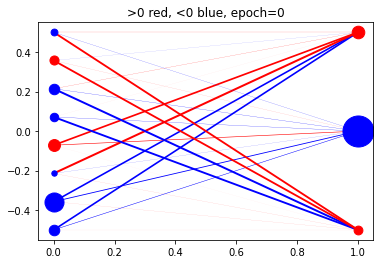

In [22]:
# way of plotting the Boltzman Machine

def create_coord(np,x0): # generates a column of regularly spaced dots
        x = [x0] * np
        y = list(range(np))
        
        #squeeze y around zero
        for i in range(np):
            y[i] = y[i]/(np-1.) -0.5  #placed in[-0.5,0.5] 
            
        return (x,y)
(x1,y1) = create_coord(L,0) #visibile units
(x2,y2) = create_coord(M,1) #hidden units

def mycolor(val):
    
    if val>0:
        return "red"
    elif val<0:
        return "blue"
    return "black"

def plotgraph(epoch=0):
    A = 2./w.max()
    for i in range(L):#visible
        for j in range(M):#hidden
            ex, ey, col = (x1[i],x2[j]), (y1[i],y2[j]), mycolor(w[i][j])
            plt.plot(ex,ey,col,zorder=1, lw=A*np.abs(w[i][j]))#lw proportional to weights
      
    A = 300./(a.max() + b.max()) #size of dots
    
    #visible units
    for i in range(L):
        plt.scatter(x1[i],y1[i],s=A*np.abs(a[i]),zorder=2,c=mycolor(a[i])) #zorder>1 ==>sopra le linee
    
    #hidden units
    for j in range(M):
        plt.scatter(x2[j],y2[j],s=A*np.abs(b[j]),zorder=2,c=mycolor(b[j]))
    
    
    plt.title(f">0 red, <0 blue, epoch={epoch}")
    plt.show()
    
plotgraph()

In [20]:
def activate(v_in, wei, bias, DE, info = False):
    act = np.dot(v_in, wei) + bias 
    prob = 1. / (1. + np.exp(-DE*act))
    n = len(act)
    v_out = np.full(n,vmin)
    v_out[np.random.random_sample(n) < prob] = 1
    if info:
        print("input=", v_in)
        print("act=", act)
        print("prob=", prob)
        print("out=", v_out)
    return v_out

activate(v[0], w, b, gap, info=True)

input= [-1  1 -1 -1  1 -1  1  1]
act= [-2.61812374 -1.32325251 -1.80799935]
prob= [0.00529203 0.06620475 0.02618592]
out= [-1 -1 -1]


array([-1, -1, -1])

...epoch= 1 n= 499 m= 500
dw= [[ 0.072  0.016 -0.024]
 [ 0.06  -0.004 -0.06 ]
 [ 0.008  0.008  0.016]
 [-0.028 -0.012 -0.044]
 [-0.036  0.068  0.068]
 [ 0.016  0.008  0.024]
 [ 0.036 -0.02   0.012]
 [-0.032  0.    -0.008]]
da= [-0.028 -0.016  0.02   0.048 -0.008  0.02  -0.008  0.004]
db= [-0.012  0.036  0.028]
...epoch= 2 n= 499 m= 500
dw= [[ 0.01142857  0.02666667 -0.00761905]
 [ 0.0152381   0.06857143 -0.04190476]
 [ 0.02285714  0.04571429  0.01142857]
 [ 0.03809524  0.10666667  0.07238095]
 [-0.02666667 -0.03428571  0.03047619]
 [-0.00761905 -0.00761905  0.02666667]
 [-0.05714286  0.05714286  0.03809524]
 [ 0.03047619  0.00761905 -0.01904762]]
da= [-0.05333333 -0.07238095 -0.07238095 -0.07238095  0.03047619  0.04190476
  0.02285714  0.02666667]
db= [ 0.00380952  0.0952381  -0.0152381 ]


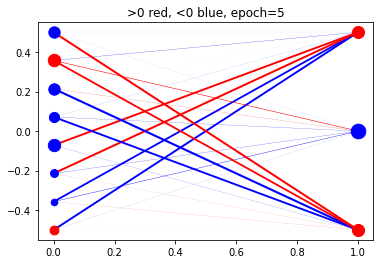

l_rate= 0.7999999999999998


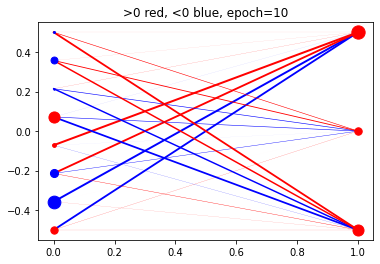

l_rate= 0.6666666666666663


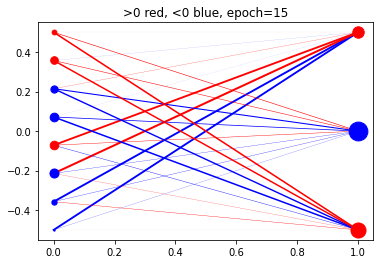

l_rate= 0.5714285714285713


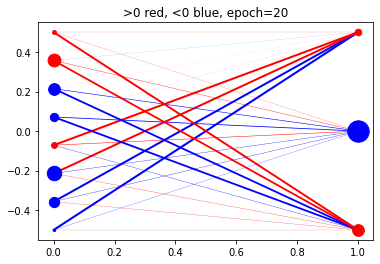

l_rate= 0.5


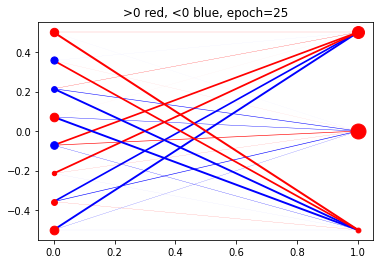

l_rate= 0.4444444444444445


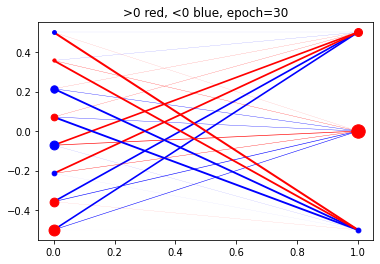

l_rate= 0.4000000000000001


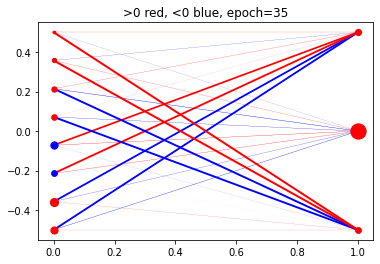

l_rate= 0.3636363636363637


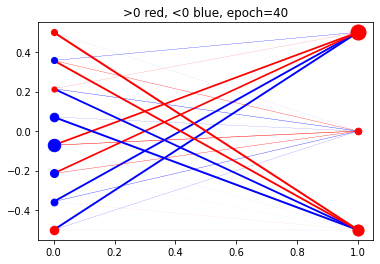

l_rate= 0.3333333333333335


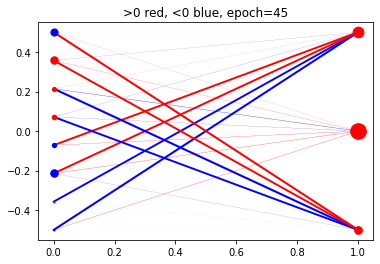

l_rate= 0.3076923076923079


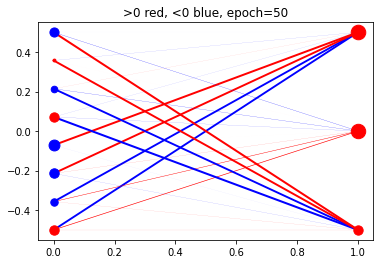

l_rate= 0.28571428571428586


In [23]:
np.random.seed(12345)

l_rate = 1.0
# minibatches 
mini, m = 500, 0
# epochs 
nepoch = 50

for epoch in range(1,1+nepoch):
    #within each epoch we should scan each sample 
    for n in range(N):
        if m==0:
            # initialize
            v_data, v_model = np.zeros(L), np.zeros(L)
            h_data, h_model = np.zeros(M), np.zeros(M)
            vh_data, vh_model = np.zeros((L,M)), np.zeros((L,M))
        # positive CD phase 
        h = activate(v[n], w, b, gap)
        # negative CD phase, vf for fantasy 
        vf = activate(h, w.T, a, gap)
        # positive CD phase, associated to vf it's using the fantasy data generated during the negative phase 
        hf = activate(vf, w, b, gap)

        # stacking the statistics

        v_data += v[n]
        v_model += vf
        h_data += h 
        h_model += hf 
        vh_data += np.outer(v[n].T, h)
        vh_model += np.outer(vf.T, hf)  
        
        m += 1

        if m == mini:
            C = l_rate / mini
            dw = C*(vh_data - vh_model)
            da = C*(v_data - v_model)
            db = C*(h_data - h_model)
            if epoch <= 2 and n <= mini:
                print("...epoch=",epoch,"n=",n,"m=",m)
                print("dw=",dw)
                print("da=",da)
                print("db=",db)

            w += dw
            a += da
            b += db 
            m = 0
    # randomizing order 
    np.random.shuffle(v)
    l_rate = l_rate / (0.05 * l_rate + 1)
    # something decaying like 1/epoch 
    if epoch % 5 == 0:
        plotgraph(epoch)
        print("l_rate=",l_rate)



In [24]:
v1 = np.full((N,L),vmin)
# we want to store inside the predictions 
for n in range(N):
    h = activate(v0[n], w, b, gap)
    v1[n] = activate(h, w.T, a, gap)

for n in range(10):
    print((v0[n]).astype(int), (v1[n]).astype(int))

[-1  1 -1 -1 -1 -1  1  1] [ 1  1 -1 -1 -1 -1  1  1]
[-1 -1 -1  1 -1 -1  1  1] [-1 -1  1  1 -1 -1  1  1]
[-1 -1  1  1  1  1 -1 -1] [-1 -1 -1  1  1  1 -1 -1]
[ 1  1 -1 -1  1 -1  1  1] [ 1  1 -1 -1 -1 -1  1 -1]
[-1 -1  1  1  1  1 -1 -1] [-1 -1  1  1 -1  1 -1 -1]
[ 1 -1  1  1  1  1 -1 -1] [-1 -1 -1  1  1  1  1 -1]
[ 1  1 -1 -1 -1 -1  1  1] [ 1  1 -1 -1 -1 -1  1  1]
[-1  1 -1 -1 -1 -1  1  1] [ 1  1 -1 -1 -1 -1  1  1]
[ 1  1  1 -1  1  1 -1 -1] [ 1 -1 -1 -1  1  1  1 -1]
[ 1 -1  1 -1  1  1 -1 -1] [ 1  1 -1 -1  1  1 -1  1]
